In [1]:
%load_ext autoreload
%autoreload 2

import os
os.environ['KMP_WARNINGS'] = 'off'
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit
import re

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [2]:
%load_ext line_profiler
%load_ext memory_profiler

In [11]:
path = "/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag/NMSSM/NMSSM_XYH_YToHH_6b"
basepath = "/store/user/srosenzw/sixb/ntuples"

sig = [
    f"{path}_MX_450_MY_300_1M/ntuple.root",
    f"{path}_MX_700_MY_400_2M/ntuple.root",
    f"{path}_MX_900_MY_300_1M/ntuple.root",
    f"{path}_MX_1000_MY_600_1M/ntuple.root",
]
bkg = [
    f"{basepath}/Autumn18/cutflow_studies/presel/QCD/*/ntuple.root",
    f"{basepath}/Summer2018UL/cutflow_studies/presel/TTJets/TTJets_TuneCP5_13TeV-amcatnloFXFX-pythia8/ntuple.root"
]

In [12]:
sig = ObjIter([Tree(f, altfile='fully_res_{base}') for f in sig])
bkg = ObjIter([Tree(f, altfile='training_{base}') for f in bkg])

100%|██████████| 17/17 [00:06<00:00,  2.55it/s]


[WARNING] skipping None, was not found.


100%|██████████| 1/1 [00:01<00:00,  1.68s/it]


100%|██████████| 1/1 [00:01<00:00,  1.43s/it]


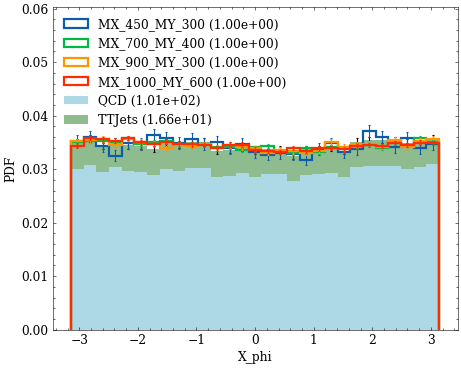

In [19]:
study.quick(
    sig+bkg, 
    legend=True,
    scale=lambda t:t.abs_scale/t.scale,
    lumi=None,
    varlist=['X_phi'],
    # binlist=[(200,2000,30)],
    efficiency=True,
)

100%|██████████| 1/1 [00:01<00:00,  1.42s/it]


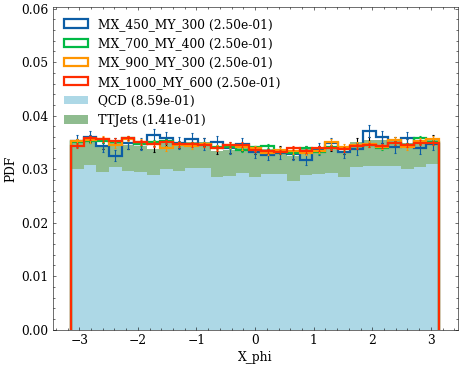

In [20]:
study.quick(
    sig+bkg, 
    legend=True,
    scale=lambda t:t.norm_abs_scale/t.scale,
    lumi=None,
    varlist=['X_phi'],
    # binlist=[(200,2000,30)],
    efficiency=True,
)

100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


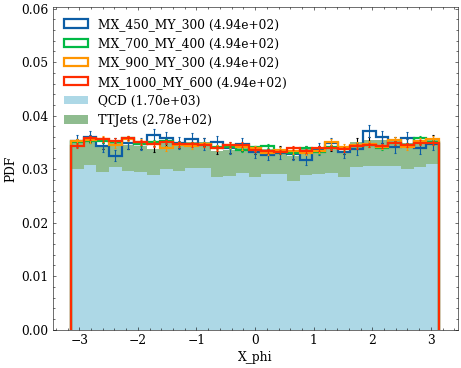

In [21]:
study.quick(
    sig+bkg, 
    legend=True,
    scale=lambda t:t.dataset_norm_abs_scale/t.scale,
    lumi=None,
    varlist=['X_phi'],
    # binlist=[(200,2000,30)],
    efficiency=True,
)

In [25]:
sig.norm_abs_scale.apply(np.sum).npy.sum()

1.0000000000000002

In [27]:
sig.dataset_norm_abs_scale.apply(np.sum).npy.sum()

1974.2304234356354

In [26]:
bkg.norm_abs_scale.apply(np.sum).npy.sum()

1.0

In [28]:
bkg.dataset_norm_abs_scale.apply(np.sum).npy.sum()

1974.2304234356345

In [29]:
path = "/store/user/srosenzw/sixb/ntuples/2018_gnn_training"
basepath = "/store/user/srosenzw/sixb/ntuples/2018_gnn_training"

t_sig = f"{path}/split_*_signal_training_ntuple.root"
t_bkg = f"{basepath}/split_*_bkg_training_ntuple.root"

In [30]:
t_sig = ObjIter([Tree(t_sig)])
t_bkg = ObjIter([Tree(t_bkg)])

100%|██████████| 5/5 [00:01<00:00,  2.81it/s]


In [35]:
sig.X_m.cat

<Array [476, 383, 433, ... 965, 957, 1.04e+03] type='609964 * float32'>

In [46]:
gen_xm = sig.gen_X_m.cat
t_gen_xm = t_sig.gen_X_m.cat

In [49]:
np.unique(gen_xm)

<Array [450, 700, 900, 1e+03] type='4 * float32'>

In [50]:
np.unique(t_gen_xm)

<Array [450, 900, 1e+03] type='3 * float32'>

(<Figure size 650x650 with 1 Axes>,
 <AxesSubplot:ylabel='PDF'>,
 [HistoList<[<utils.plotUtils.histogram.Histo object at 0x7f5708bbe0a0>, <utils.plotUtils.histogram.Histo object at 0x7f57067f6f70>]>])

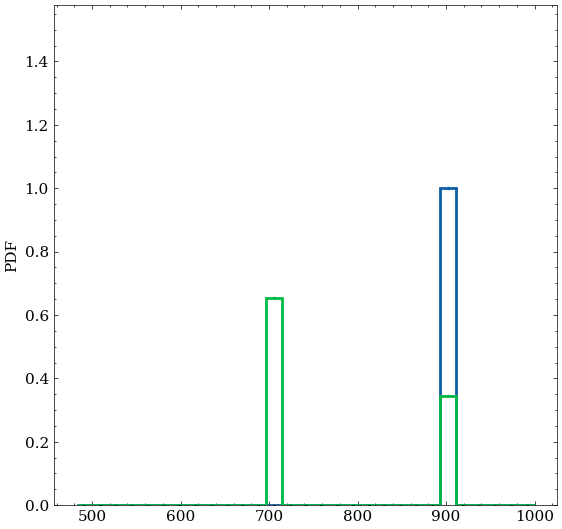

In [45]:
hist_multi([t_sig.gen_X_m.cat, sig.gen_X_m.cat], efficiency=True)

In [32]:
t_sig.dataset_norm_abs_scale.apply(np.sum)

[1480.6728175767264]

In [31]:
t_bkg.dataset_norm_abs_scale.apply(np.sum)

[1974.2304234356334]